In [3]:
#import labs for working

import random
from collections import Counter
import json
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [4]:
#Len of mass
N = 100

N_population = 1000

In [5]:
def generate_list_of_values(count_of_elements: int) -> list[float]:
    "Generate subsequence to list"
    list_of_values: list = [round(random.random(), 3) \
                            for i in range(count_of_elements)]
    return list_of_values

In [6]:
def make_collection_of_values(list_of_values: list[float]) -> Counter[float]:
    "Discrete distribution function (frequency polygon)"
    return Counter(list_of_values)

In [7]:
def beautiful_print_of_discrate_population(collections_of_values: dict) -> None:
    "Print Discrete distribution function (frequency polygon)"
    print('{:<13} {}'.format('Value', 'Count'))
    [print(values, " ", collections_of_values[values]) \
     for values in collections_of_values]

# beautiful_print_of_discrate_population(collections_of_values)

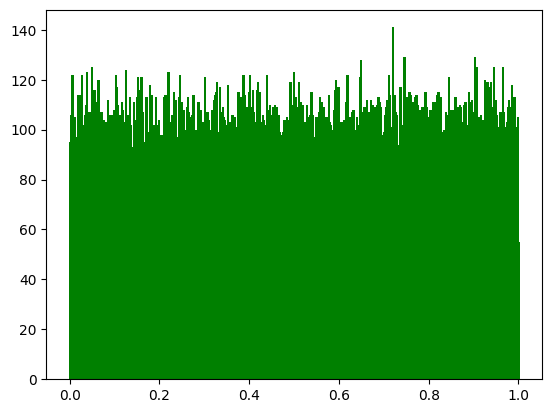

In [21]:
def plotting_discrate_population(collections_of_values: dict) -> None:
    'Visualisation of population'

    plt.bar(list(collections_of_values.keys()), \
            list(collections_of_values.values()), width=0.005, color='g')
    plt.show()



In [9]:
def create_p_i(N: int, collections_of_values: dict):
    values_of_n_i = list(collections_of_values.values())
    P_i = [i / N for i in values_of_n_i]
    return P_i






In [10]:
def create_n_i_hatch(P_i: list, N: int):
    n_i_hatch = [x * N for x in P_i]
    return n_i_hatch




In [11]:
def n_i_minus_n_i_hatch(collections_of_values: dict, n_i_hatch: list):
    values_of_n_i = list(collections_of_values.values())
    munes = [x - y for x, y in zip(values_of_n_i, n_i_hatch)]
    return munes





In [12]:
def sqrt_minus(minus: list):
    sqrt_minus = [i * i for i in minus]
    return sqrt_minus




In [13]:
def sqrt_div_n_i_hatch(sqrt_: list, n_i_hatch: list):
    result = [x / y for x, y in zip(sqrt_, n_i_hatch)]
    return result

In [14]:
# sum_of_result = sum(result)

In [15]:
def create_all_values(N_population: int, N: int):
    list_of_values: list = []
    for i in range(N_population):
        list_of_values_iter = generate_list_of_values(N)
        list_of_values.extend(list_of_values_iter)
    return list_of_values



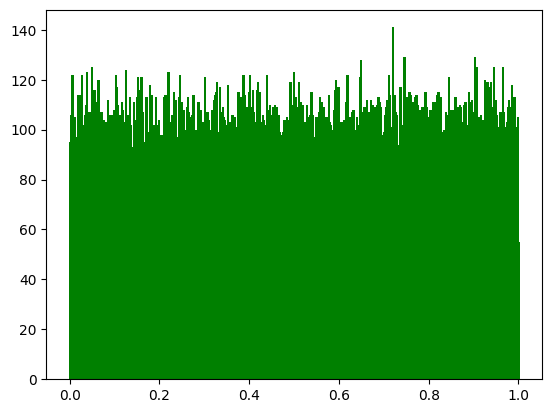

In [16]:
list_of_values = create_all_values(N_population, N)
collections_of_values = make_collection_of_values(list_of_values)
plotting_discrate_population(dict(collections_of_values))
P_i = create_p_i(N, collections_of_values)
n_i_hatch = create_n_i_hatch(P_i, N * N_population) 
minus = n_i_minus_n_i_hatch(collections_of_values, n_i_hatch)
sqrt_ = sqrt_minus(minus)
result = sqrt_div_n_i_hatch(sqrt_, n_i_hatch)
sum_of_result = sum(result)

In [17]:
data = {
        'n_i'             : pd.Series(collections_of_values.values()),
        'value'           : pd.Series(collections_of_values.keys()),
        'P_i'             : pd.Series(P_i),
        'n_i_hatch'       : pd.Series(n_i_hatch),
        'n_i - n_i_hatch' : pd.Series(minus),
        'sqrt'            : pd.Series(sqrt_),
        'sqrt/n_i_hatch'  : pd.Series(result),
        'X^2_obs'         : pd.Series(sum_of_result)
        }
df = pd.DataFrame(data)
df

,n_i,value,P_i,n_i_hatch,n_i - n_i_hatch,sqrt,sqrt/n_i_hatch,X^2_obs
0,99,0.388,0.99,99000.0,-98901.0,9.781408e+09,98802.099,99800100.0
1,98,0.930,0.98,98000.0,-97902.0,9.584802e+09,97804.098,NaN
2,110,0.440,1.10,110000.0,-109890.0,1.207581e+10,109780.110,NaN
3,97,0.267,0.97,97000.0,-96903.0,9.390191e+09,96806.097,NaN
4,98,0.355,0.98,98000.0,-97902.0,9.584802e+09,97804.098,NaN
...,...,...,...,...,...,...,...,...
996,103,0.400,1.03,103000.0,-102897.0,1.058779e+10,102794.103,NaN
997,109,0.872,1.09,109000.0,-108891.0,1.185725e+10,108782.109,NaN
998,113,0.263,1.13,113000.0,-112887.0,1.274347e+10,112774.113,NaN
999,105,0.047,1.05,105000.0,-104895.0,1.100296e+10,104790.105,NaN


In [18]:
# def calculated_interval_of_population(collections_of_values: dict, N: int) -> float:
#     'Calculate step and count of intervals in population'
#     x_max = max(collections_of_values.keys())
#     x_min = min(collections_of_values.keys())

#     print(x_min, x_max)

#     k = (math.log10(N) * 3.322) + 1
#     print (round(k))

#     if k > 15:
#         k = 15
#     elif k < 5:
#         k = 5

#     h = (x_max - x_min)/k  

#     return round(k)

# interval = calculated_interval_of_population(collections_of_values, N)

In [19]:
# def make_intervals_population(list_of_values: list, interval: int):
#     'counting values in an interval'
#     s = pd.Series(list_of_values)
#     # s = s.groupby(pd.cut(s, bins = interval), observed= True)\
#     #           .apply(lambda x: x.to_list())
#     s = pd.cut(s, bins=interval, right=False).value_counts()
#     print(s)
#     print(type(s))
    

In [20]:
# make_intervals_population(list_of_values, int(interval))